In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 50.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import sys

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/My Drive/Colab Notebooks')

from upscale_sentinel import SentinelDataProcessor, UpscaleModelTrainer

Mounted at /content/drive


In [3]:
section_size = 224
upscaling_factor = 4
folder_path = '/content/drive/My Drive/Sentinel'

In [4]:
img_data = SentinelDataProcessor(folder_path, section_size=section_size, upscaling_factor=upscaling_factor)

sentinel2_Alps_s23_small.tif
sentinel2_Alps_w23_small.tif
sentinel2_BlackForest_s23_small.tif
sentinel2_BlackForest_w23_small.tif
sentinel2_Camargue_s23_small.tif
sentinel2_Camargue_w23_small.tif
sentinel2_CarpathianMountains_s23_small.tif
sentinel2_CarpathianMountains_w23_small.tif
sentinel2_DalmatianCoast_s23_small.tif
sentinel2_DalmatianCoast_w23_small.tif
sentinel2_DanubeDelta_s23_small.tif
sentinel2_DanubeDelta_w23_small.tif
sentinel2_LaMancha_s23_small.tif
sentinel2_LaMancha_w23_small.tif
sentinel2_Peloponnese_s23_small.tif
sentinel2_Peloponnese_w23_small.tif
sentinel2_ScottishHighlands_s23_small.tif
sentinel2_ScottishHighlands_w23_small.tif
sentinel2_VenetianLagoon_s23_small.tif
sentinel2_VenetianLagoon_w23_small.tif
Image data array shape: (2744, 224, 224, 3)
downsampling input data...


  0%|          | 0/2744 [00:00<?, ?it/s]

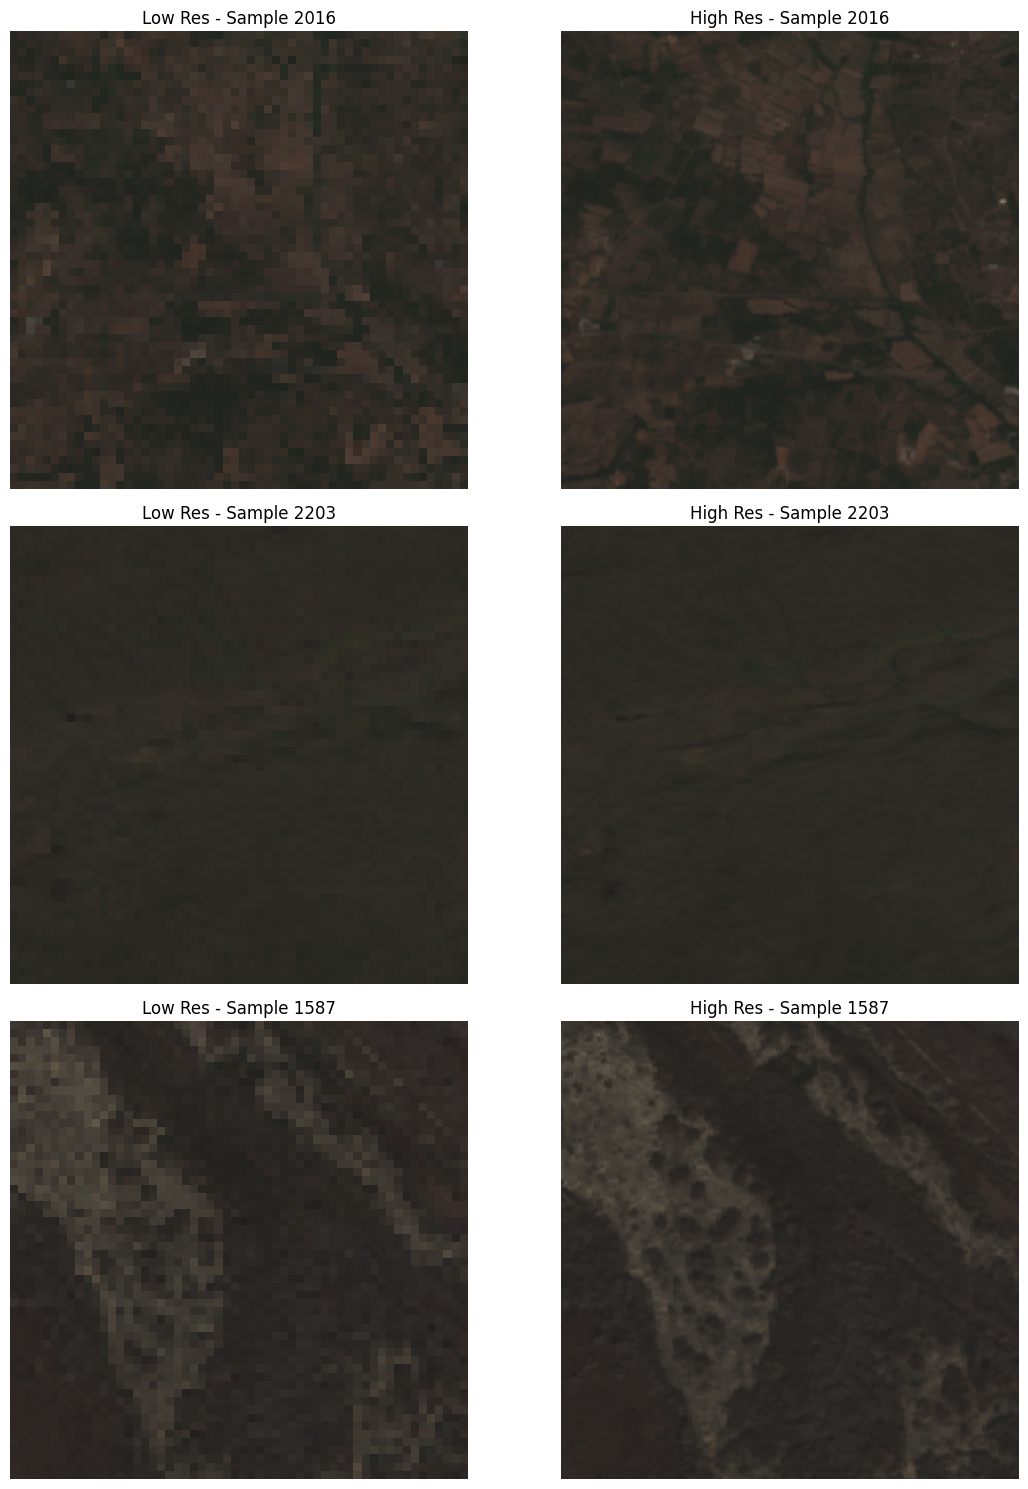

In [5]:
img_data.plot_samples()

In [6]:
upscale_model = UpscaleModelTrainer(input_shape=img_data.input_train.shape[1:], filter_gen=64, upscale_factor=upscaling_factor)

58889256/58889256 [==============================] - 2s 0us/step
Model: "gen"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 56, 56, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 56, 56, 64)           4864      ['input_2[0][0]']             
                                                                                                  
 p_re_lu (PReLU)             (None, 56, 56, 64)           64        ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 56, 56, 64)           36928     ['p_re_lu[0][0]']             
                               

In [17]:
upscale_model.loss_weights

[1, 0.3, 0.001, 5e-09]

In [ ]:
upscale_model.train_upscale(training_data = [img_data.input_train, img_data.output_train],
                            validation_data = [img_data.input_test, img_data.output_test],
                            epochs=50,
                            batch_size=32,
                            aug_data=True)

epochs:   0%|          | 0/50 [00:00<?, ?it/s]

batches:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch 1/50 	[Disc loss: (r 0.650896/f 0.623053), acc.: (r 0.6336/f 0.6689)] [Gen loss: 0.016867, mse: 0.015087, vgg: 0.005033, adv: 0.000642, tv: -0.003895]


Validation:   0%|          | 0/14 [00:00<?, ?it/s]

Validation: 	[Disc loss: (r 0.633440/f 0.978465), acc.: (r 0.7909/f 0.0216)] [Gen loss: 0.002763, mse: 0.000977, vgg: 0.000779, adv: 0.000478, tv: 0.000528]
------------------------------------------------------------------------------------------------------------------------


batches:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch 2/50 	[Disc loss: (r 0.652385/f 0.634546), acc.: (r 0.6478/f 0.6777)] [Gen loss: 0.002595, mse: 0.000809, vgg: 0.000753, adv: 0.000620, tv: 0.000413]


Validation:   0%|          | 0/14 [00:00<?, ?it/s]

Validation: 	[Disc loss: (r 0.618191/f 1.014589), acc.: (r 0.8293/f 0.0144)] [Gen loss: 0.002492, mse: 0.000755, vgg: 0.000751, adv: 0.000457, tv: 0.000529]
------------------------------------------------------------------------------------------------------------------------


batches:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch 3/50 	[Disc loss: (r 0.666794/f 0.626768), acc.: (r 0.6253/f 0.6923)] [Gen loss: 0.002403, mse: 0.000606, vgg: 0.000690, adv: 0.000631, tv: 0.000477]


Validation:   0%|          | 0/14 [00:00<?, ?it/s]

Validation: 	[Disc loss: (r 0.596208/f 1.048945), acc.: (r 0.8630/f 0.0120)] [Gen loss: 0.002509, mse: 0.000786, vgg: 0.000757, adv: 0.000438, tv: 0.000528]
------------------------------------------------------------------------------------------------------------------------


batches:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch 4/50 	[Disc loss: (r 0.658010/f 0.629984), acc.: (r 0.6653/f 0.6889)] [Gen loss: 0.002403, mse: 0.000606, vgg: 0.000698, adv: 0.000619, tv: 0.000480]


Validation:   0%|          | 0/14 [00:00<?, ?it/s]

Validation: 	[Disc loss: (r 0.594512/f 1.101219), acc.: (r 0.8798/f 0.0000)] [Gen loss: 0.002482, mse: 0.000775, vgg: 0.000756, adv: 0.000411, tv: 0.000540]
------------------------------------------------------------------------------------------------------------------------


batches:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch 5/50 	[Disc loss: (r 0.713863/f 0.574160), acc.: (r 0.3750/f 0.8750)] [Gen loss: 0.002291, mse: 0.000526, vgg: 0.000665, adv: 0.000648, tv: 0.000452]

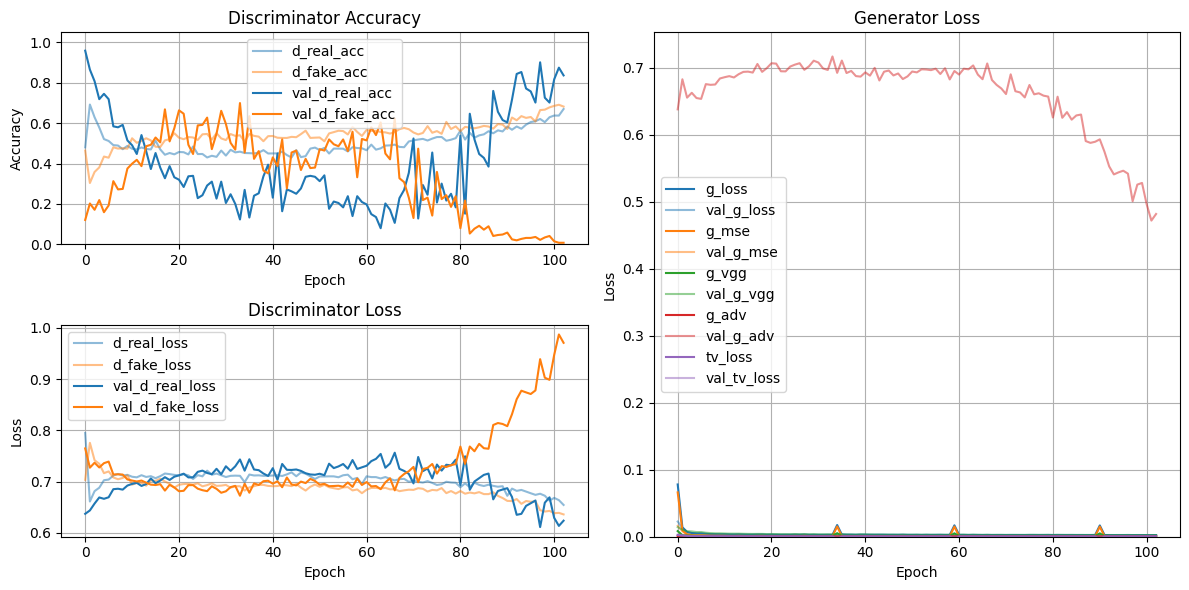

In [25]:
upscale_model.plot_history()

In [26]:
data_set = img_data.input_val
true_data = img_data.output_val

predictions = upscale_model.predict_upscale_data(data_set)

4/4 [==============================] - 1s 168ms/step


Random offset: 59, Total samples: 110


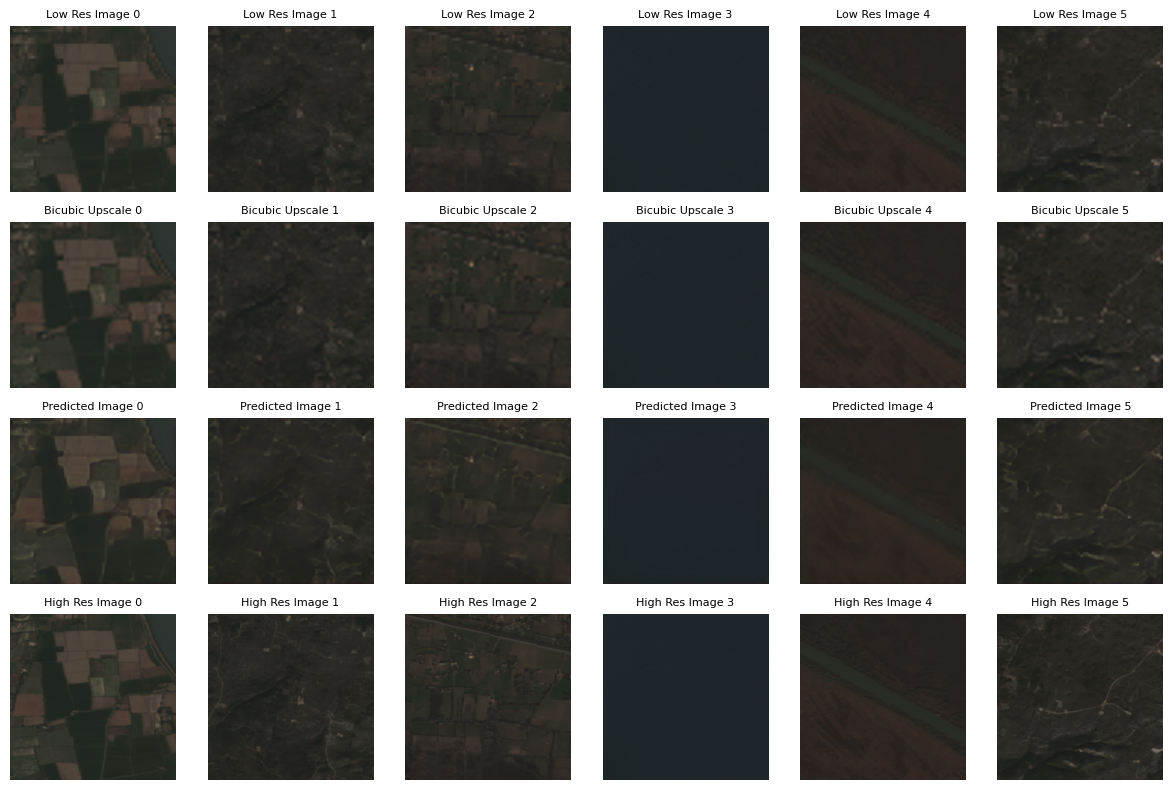

In [27]:
upscale_model.visualize_upscale_pred(data_set, predictions[0], true_data)

In [22]:
upscale_model.save_discriminator(path_name='/content/drive/My Drive/Colab Notebooks/temp2_disc.keras')
upscale_model.save_generator(path_name='/content/drive/My Drive/Colab Notebooks/temp2_gen.keras')

Model: "gen"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 56, 56, 3)]          0         []                            
                                                                                                  
 conv2d_36 (Conv2D)          (None, 56, 56, 64)           4864      ['input_6[0][0]']             
                                                                                                  
 p_re_lu_16 (PReLU)          (None, 56, 56, 64)           64        ['conv2d_36[0][0]']           
                                                                                                  
 conv2d_37 (Conv2D)          (None, 56, 56, 64)           36928     ['p_re_lu_16[0][0]']          
                                                                                                

In [ ]:
upscale_model.load_generator(gen_path='/content/drive/My Drive/Colab Notebooks/temp_gen.keras')

In [28]:
upscale_model.update_loss_weights(new_weights=[1, 0.3, 0.001, 5e-09], lr=0.00005)